# Next-Event Simulation Assignment (A2)
### Year 2020-2021  - Semester II
### CCE3502
#### Developed by - Adrian Muscat, 2021
---

# Wayne Falzon, 225401L, BSc Maths and CS, Yr 2


In this assignment you will be implementing next-event simulations for systems involving queues and service nodes.

NOTES: 
1. The first few questions are not graded (lab-work), whereas the last two numbered questions are graded (home-work), total marks =100.

1. You will find the functions developed in the non-graded part useful in the graded part.

3. The assignment is worth 20% of the final unit mark.

2. Submit a pdf version of the final jupyter notebook (as a turn-it-in job on VLE) and the jupyter notebook itself separately (as an assignment job on VLE)

2. This assignment is to be attempted individually. It is essential that the work you submit and present consists only of your own work; use of copied material will be treated as plagiarism. Discussion is only permitted on general issues, and it is absolutely forbidden to discuss specific details with anyone and/or share results.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import Image
%matplotlib inline

## Below is a ready-coded single server queuing system next-event simulation. 
## Go through the code and note the event service routines, timing routine, inter-arrival-time and service-time generators, etc.


In [2]:
#Below is some general use of python dictionaries 
a= ['joe', 20,'male'] 
print(a[0])

b = {'name':'john', 'age':24, 'gender':'M'}
b.keys()
b['age'] += 1 
b['age']

joe


25

In [3]:
fileOutA = True   # Flag, if True save state variable values to state_history
notice=[]       # notice = [ notice number, time, type, meta-param ]
                # type = 0, arrival
                # type = 1, begin service
                # type = 2, end service
                # meta-param = extra parameters in a tuple

# Store state variables, simulation variables and history in a python dictionary 
# and pass dict pointer to functions
var_dict={}
var_dict['state_var']={'Q':0, # Queue Length, Q=0 when empty
                       'S':0} # Server State 0=idle, 1=busy
#
var_dict['sim_var'] = {'EN':0, # Event Notice Number
                       'event_list':[], # Event calendar list
                       'now':0.0, # simulation time
                       'inter_arr_time':[],  #array to store history
                       'service_time':[],    # array to store history
                       'sim_end_time':100}
#
var_dict['state_history'] = {'Q':[], 'S':[], 'time_stamp':[]}
var_dict['event_history'] = {'event_type':[], 'time_stamp':[]}

In [4]:
# do not modify this cell
def ScheduleEventNotice(notice, var_dict):
    eventList = var_dict['sim_var']['event_list']  # pointer to event_list
    if len(eventList)==0:
        eventList.append(notice)
    elif len(eventList)==1:
        if eventList[0][1] <= notice[1]:
            eventList.append(notice)
        else:
            eventList.insert(0,notice)
    elif eventList[len(eventList)-1][1] < notice[1]:
        eventList.append(notice)
    else:
        i=0
        while (eventList[i][1]<=notice[1] and i<(len(eventList)-1)):
            i += 1
        eventList.insert(i,notice)

In [5]:
# Do not modify this cell
def DisplayEventList(header, var_dict):
    print(header)
    i=0
    while i<len(var_dict['sim_var']['event_list']):
        print(var_dict['sim_var']['event_list'][i])
        i += 1

def writeToFile(var_dict):
    SaveStateVar(var_dict)
    
def SaveStateVar(var_dict):
    var_dict['state_history']['Q'].append(var_dict['state_var']['Q'])
    var_dict['state_history']['S'].append(var_dict['state_var']['S'])
    var_dict['state_history']['time_stamp'].append(var_dict['sim_var']['now'])
    
def DisplayHistoryList(header, var_dict):
    print(header)
    i=0
    while i<len(var_dict['event_history']['event_type']):
        print("%20s : %8.2f"%(var_dict['event_history']['event_type'][i],
                              var_dict['event_history']['time_stamp'][i]))
        i += 1


In [6]:
# Do not modify this cell
def InterArrivalTime(average=10):
    return -average*np.log(np.random.rand())

def ServiceTime(average=8):
    return -average*np.log(np.random.rand())

In [7]:
# Do not modify this cell
def EventRoutineArrival(var_dict):
    # Write to history
    var_dict['event_history']['event_type'].append('arrival')
    var_dict['event_history']['time_stamp'].append(var_dict['sim_var']['now'])    
    #
    # schedule next arrival event
    if var_dict['sim_var']['now'] < var_dict['sim_var']['sim_end_time']:
        var_dict['sim_var']['EN'] += 1
        eventTime = var_dict['sim_var']['now'] + InterArrivalTime()
        notice=[var_dict['sim_var']['EN'], eventTime, 0,()]
        ScheduleEventNotice(notice, var_dict)
    #
    # update state variables and event_list
    var_dict['state_var']['Q'] += 1  #Q = Q + 1    
    if var_dict['state_var']['S'] == 0:   #if S==0:
        var_dict['sim_var']['EN'] += 1
        notice=[var_dict['sim_var']['EN'], var_dict['sim_var']['now'], 1, ()]
        ScheduleEventNotice(notice, var_dict)
    #
    return 0


def EventRoutineBeginService(var_dict):
    # Write to history
    var_dict['event_history']['event_type'].append('begin_service')
    var_dict['event_history']['time_stamp'].append(var_dict['sim_var']['now'])    
    #
    # update state variables and event_list
    var_dict['state_var']['Q'] -= 1  #Q = Q - 1  
    var_dict['state_var']['S'] = 1
    #
    var_dict['sim_var']['EN'] += 1
    sT = ServiceTime()
    var_dict['sim_var']['service_time'].append(sT)
    eventTime = var_dict['sim_var']['now'] + sT
    notice=[var_dict['sim_var']['EN'], eventTime, 2, ()]
    ScheduleEventNotice(notice, var_dict)
    #
    return 0
    

def EventRoutineEndService(var_dict):
    # Write to history
    var_dict['event_history']['event_type'].append('end_service')
    var_dict['event_history']['time_stamp'].append(var_dict['sim_var']['now'])    
    #
    # update state variables and event_list
    var_dict['state_var']['S'] = 0  #S=0
    if var_dict['state_var']['Q'] > 0:  #if Q>0
        var_dict['sim_var']['EN'] +=1
        eventTime = var_dict['sim_var']['now']
        notice = [var_dict['sim_var']['EN'], eventTime, 1, ()]
        ScheduleEventNotice(notice, var_dict)
    #
    return 0



In [8]:
# Do not modify this cell
np.random.seed(0)
fileOutA=True   # Flag, if True save variable values
notice=[]       # notice = [ notice number, time, type, meta-param ]
                # type = 0, arrival
                # type = 1, begin service
                # type = 2, end service
                # meta-param = extra parameters in a tuple

# reset state variables, simulation variables and history
var_dict['state_var']={'Q':0, 'S':0}
var_dict['sim_var'] = {'EN':0, 'now':0.0, 'event_list':[], 'inter_arr_time':[],
                       'service_time':[],
                      'sim_end_time':400}
var_dict['state_history']={'Q':[], 'S':[], 'time_stamp':[]}
var_dict['event_history'] = {'event_type':[], 'time_stamp':[]}

# Schedule arrival event at time NOW; boot-strapping the simulation
notice=[var_dict['sim_var']['EN'], var_dict['sim_var']['now'], 0, ()]
ScheduleEventNotice(notice, var_dict)

print('Start of Simulation run')

#while (var_dict['sim_var']['event_list']!=[] and var_dict['sim_var']['now']<sim_end_time):
while (var_dict['sim_var']['event_list']!=[]):
    var_dict['sim_var']['now'] = var_dict['sim_var']['event_list'][0][1]
    if var_dict['sim_var']['event_list'][0][2]==0:
        EventRoutineArrival(var_dict)
    elif var_dict['sim_var']['event_list'][0][2]==1:
        EventRoutineBeginService(var_dict)
    elif var_dict['sim_var']['event_list'][0][2]==2:
        EventRoutineEndService(var_dict)
    else:
        print('Unknown event type')

    var_dict['sim_var']['event_list'].pop(0)      # Remove first notice
    if fileOutA: writeToFile(var_dict)

print('End of Simulation run')

Start of Simulation run
End of Simulation run


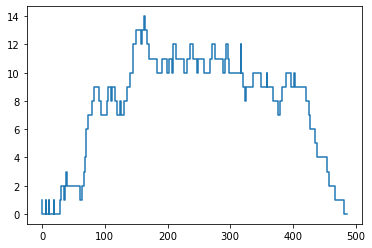

In [9]:
plt.step(var_dict['state_history']['time_stamp'],var_dict['state_history']['Q'], where='post')

## Verification stage : you will use the example given in leemis and park class slides (example 1.2.2) to verify and gain confidence in your simulator.  This step requires the computation of delay incurred by each job, plotting the number of jobs in the system against time and computing job and time-averaged statistics.
## NOTE: It is very important that you complete this step in full. Not doing so  will raise questions on the validity of the answers in the graded section.
---

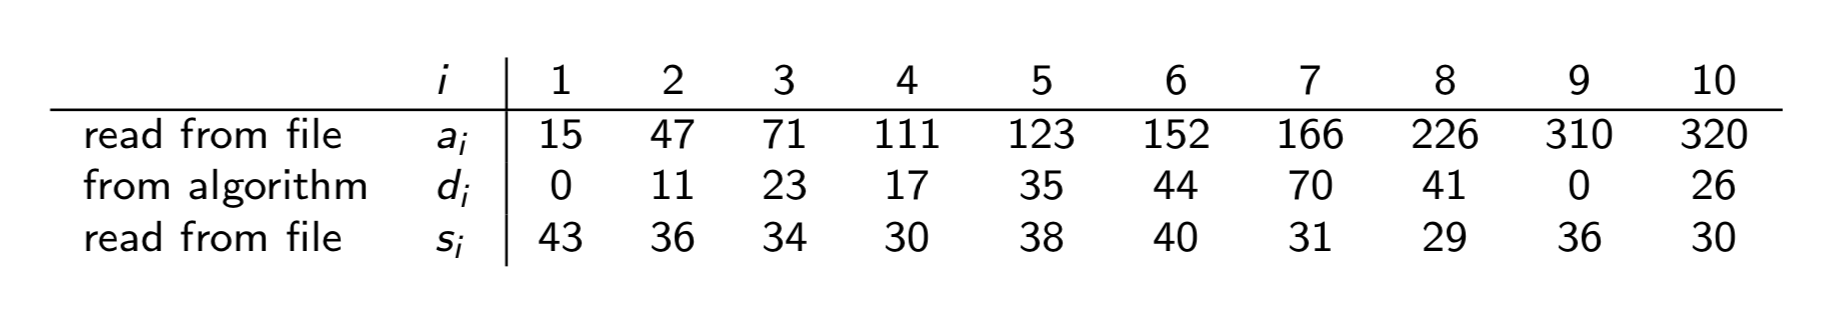

In [10]:
Image(filename='table.png',width=800, height=400)

## Use the below functions  to generate the inter-arrival-times and service-times


In [11]:
# Do not modify this cell
#
#copy arrival times from notes (leemis and park, e.g 1.2.2, page 10),and  insert 0 at position 0
a_i = np.array([0, 15., 47., 71., 111., 123., 152., 166., 226., 310., 320.])

#
#Compute inter arrival times
iat_i = a_i[1:]-a_i[0:-1]
#
d_i = np.array([0, 0., 11., 23., 17, 35, 44, 70, 41, 0, 26]) #copy computed delay times for verifying
s_i = np.array([0,43, 36., 34., 30., 38, 40, 31, 29, 36, 30]) #copy service times from notes
#
# define global variable to save the last index accessed
iat_k = 0
st_k = 0
#
# Modified RN generators
#

def InterArrivalTime(average=10):
    global iat_k
    iat_k +=1
    return iat_i[iat_k-1]

def ServiceTime(average=8):
    global st_k
    st_k += 1
    return s_i[st_k-1]


## Copy and run the timing routine in below cell 
### Note : you may also have to modify the timing routine (e.g. time-limit) and maybe the arrival routine.

In [12]:
#this is a modified version which appends the iat's (changes have comments )
def EventRoutineArrival(var_dict):
    # Write to history
    var_dict['event_history']['event_type'].append('arrival')
    var_dict['event_history']['time_stamp'].append(var_dict['sim_var']['now'])    
    #
    # schedule next arrival event
    if var_dict['sim_var']['now'] < var_dict['sim_var']['sim_end_time']:
        var_dict['sim_var']['EN'] += 1
        iat = InterArrivalTime() #computing arrival time 
        var_dict['sim_var']['inter_arr_time'].append(iat) #appending to the dictionary
        eventTime = var_dict['sim_var']['now'] + iat #adding the iat 
        notice=[var_dict['sim_var']['EN'], eventTime, 0,()]
        ScheduleEventNotice(notice, var_dict)
    #
    # update state variables and event_list
    var_dict['state_var']['Q'] += 1  #Q = Q + 1    
    if var_dict['state_var']['S'] == 0:   #if S==0:
        var_dict['sim_var']['EN'] += 1
        notice=[var_dict['sim_var']['EN'], var_dict['sim_var']['now'], 1, ()]
        ScheduleEventNotice(notice, var_dict)
    #
    return 0

In [13]:
# Do not modify this cell
np.random.seed(0)
fileOutA=True   # Flag, if True save variable values
eventList=[]    # Event calendar list
notice=[]       # notice = [ notice number, time, type ]
                # type = 0, arrival
                # type = 1, begin service
                # type = 2, end service

# reset state variables, simulation variables and history
var_dict['state_var']={'Q':0, 'S':0}
var_dict['sim_var'] = {'EN':0, 'now':0.0, 'event_list':[], 'now':0.0, 'inter_arr_time':[],
                       'service_time':[], 'sim_end_time':400}
var_dict['state_history']={'Q':[], 'S':[], 'time_stamp':[]}
var_dict['event_history'] = {'event_type':[], 'time_stamp':[]}


# Schedule arrival event at time NOW;
notice=[var_dict['sim_var']['EN'], var_dict['sim_var']['now'], 0]
ScheduleEventNotice(notice, var_dict)

print('Start of Simulation run')
#####################################################################
iat_i = np.concatenate((iat_i,np.array([500.,600., 700.])))  # add these to sustain simulation
#####################################################################


#while (var_dict['sim_var']['event_list']!=[] and var_dict['sim_var']['now']<40):
#while (st_k<11):
while (var_dict['sim_var']['now']<376):
    var_dict['sim_var']['now'] = var_dict['sim_var']['event_list'][0][1]
    if var_dict['sim_var']['event_list'][0][2]==0:
        EventRoutineArrival(var_dict)
    elif var_dict['sim_var']['event_list'][0][2]==1:
        EventRoutineBeginService(var_dict)
    elif var_dict['sim_var']['event_list'][0][2]==2:
        EventRoutineEndService(var_dict)
    else:
        print('Unknown event type')

    var_dict['sim_var']['event_list'].pop(0)      # Remove first notice
    if fileOutA: writeToFile(var_dict)

print('End of Simulation run')

Start of Simulation run
End of Simulation run


In [14]:
print(var_dict['sim_var']['inter_arr_time']) #consistency check to see interarrivals 
#one notices how the first element from the concatenation is added 

[15.0, 32.0, 24.0, 40.0, 12.0, 29.0, 14.0, 60.0, 84.0, 10.0, 500.0]


## Use the stored state-variable or event history to compute the delay for each job and compare the computed delay with d_i, delay from (leemis and park) example 1.2.2

[0.0, 0.0, 11.0, 23.0, 17.0, 35.0, 44.0, 70.0, 41.0, 0.0, 26.0]

 this is confirmed with the table below


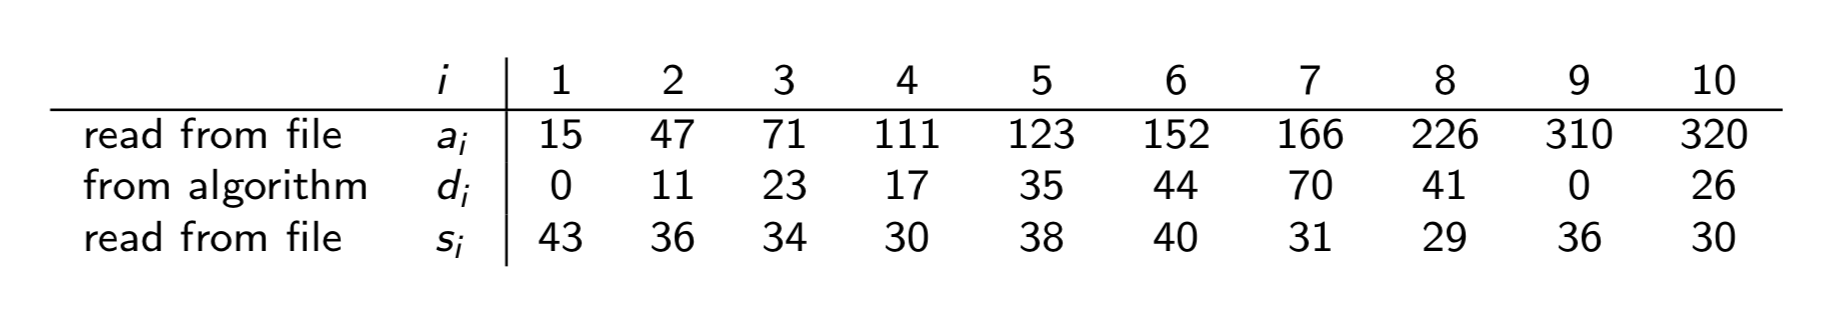

In [15]:
def FindDelay(var_dict):
    
    delay=[]#holds the delays
    arrivals = [] #holds the arrivals
    begin_services = [] #holds the beginning service times 
    
    for i in range(len(var_dict['event_history']['time_stamp'])):#for every event
        if var_dict['event_history']['event_type'][i] == 'arrival':#check for arrival
            arrivals.append(var_dict['event_history']['time_stamp'][i])#store the time 
            
        if var_dict['event_history']['event_type'][i] == 'begin_service': #check for the beginning of a service
            begin_services.append(var_dict['event_history']['time_stamp'][i])
            
    for i in range(len(arrivals)):
        delay.append(begin_services[i]-arrivals[i]) #calculate the delay for all the arrivals 
        
    return delay#return the delay 

d_i = FindDelay(var_dict)
print(d_i)

print("\n this is confirmed with the table below")
Image(filename='table.png',width=800, height=400)

## Develop a function to plot the number of jobs in the system versus time and visually compare your graph to the graph given on page 17 (leemis and park class slides) 


In [16]:
def get_jobs_node_vs_t(var_dict):
    Q_l = var_dict['state_history']['Q']
    S_l = var_dict['state_history']['S']
    t_l = var_dict['state_history']['time_stamp']
    Q = np.array(Q_l)
    S = np.array(S_l)
    t = list(t_l)
    N = list(Q + S)
    i=0
    while i<(len(N)-1):
        if t[i] == t[i+1]:
            del(t[i])
            del(N[i])
        else:
            i += 1
    return N, t

def get_jobs_queue_vs_t(var_dict):
    Q_l = var_dict['state_history']['Q']
    t_l = var_dict['state_history']['time_stamp']
    Q = list(Q_l)
    t = list(t_l)
    i=0
    while i<(len(Q)-1):
        if t[i] == t[i+1]:
            del(t[i])
            del(Q[i])
        else:
            i += 1
    return Q, t

def get_server_status_vs_t(var_dict):
    S_l = var_dict['state_history']['S']
    t_l = var_dict['state_history']['time_stamp']
    S = list(S_l)
    t = list(t_l)
    i=0
    while i<(len(S)-1):
        if t[i] == t[i+1]:
            del(t[i])
            del(S[i])
        else:
            i += 1
    return S, t

In [17]:
def get_piecewise_vec(A_X,s):
    # convert vector to a piecewise linear vector 
    # s = 0 or 1
    L_X=[]
    if s==1:
        L_X =[A_X[0]]
    for i in range(int(s), A_X.shape[0]-(1-int(s))):
        L_X.append(A_X[i])
        L_X.append(A_X[i])
    if s==0:
        L_X.append(A_X[-1])
    return np.array(L_X)

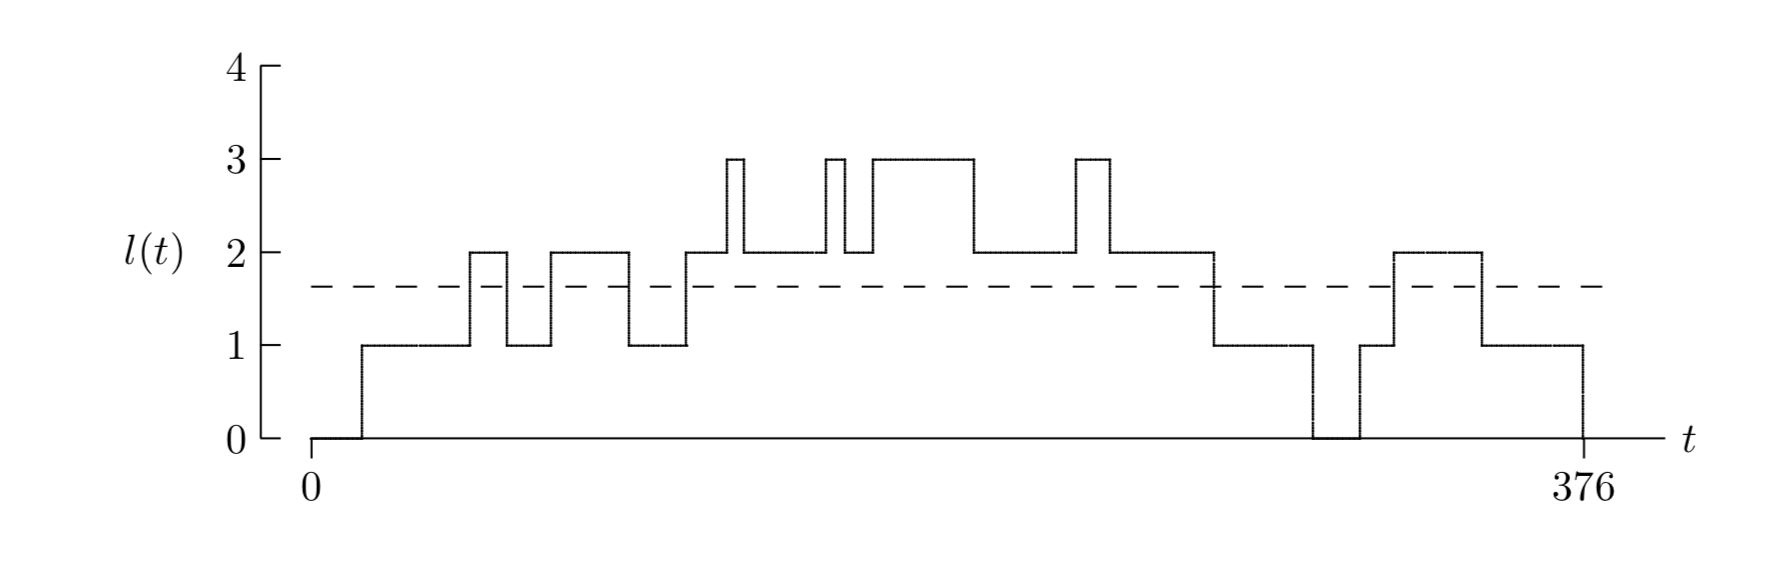

In [18]:
from IPython.display import Image
Image(filename='queue.png',width=800, height=400)

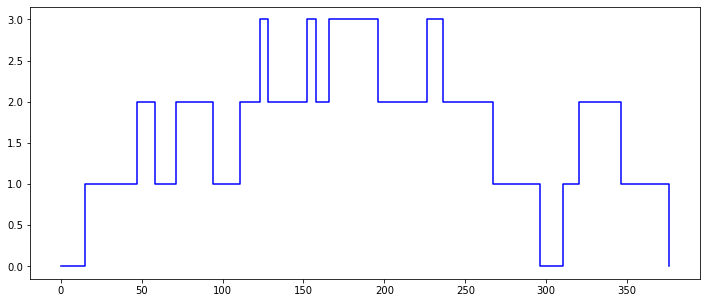

In [19]:
N, t = get_jobs_node_vs_t(var_dict)
N_p = get_piecewise_vec(np.array(N),0)
t_p = get_piecewise_vec(np.array(t),1)
#
plt.figure(figsize=(12,5))
plt.plot(t_p, N_p,'b') #Like the graph above 


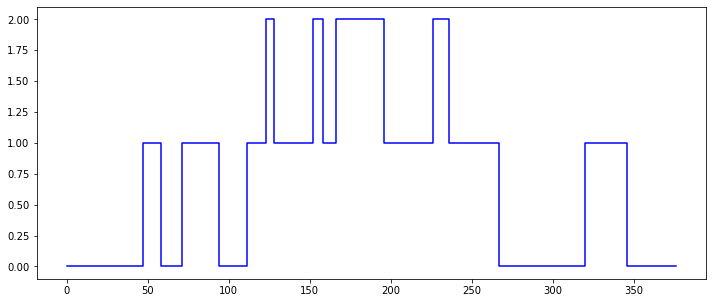

In [20]:
# plot queue versus time
Q, t = get_jobs_queue_vs_t(var_dict)
Q_p = get_piecewise_vec(np.array(Q),0)
t_p = get_piecewise_vec(np.array(t),1)
plt.figure(figsize=(12,5))
plt.plot(t_p, Q_p,'b')
plt.show()

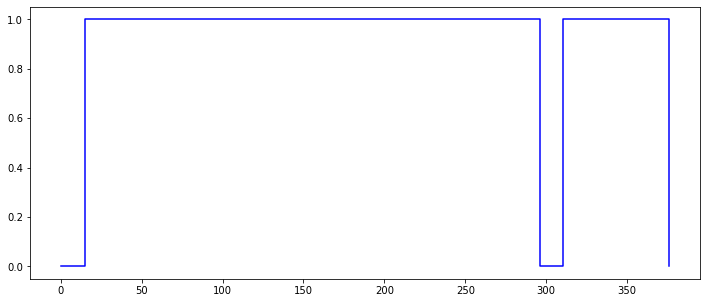

In [21]:
# plot server status versus time
S, t = get_server_status_vs_t(var_dict)
S_p = get_piecewise_vec(np.array(S),0)
t_p = get_piecewise_vec(np.array(t),1)
plt.figure(figsize=(12,5))
plt.plot(t_p, S_p,'b')

## Develop functions to calculate the average queue length, average number of jobs in system, average interarrival rate, server utilisation and mean waiting time. Verify these functions with results from the example in the class notes (leemis and park pgs. 15 & 19)


In [22]:
def get_TimeAveragedStats(V, t):
    # V : number of jobs at a time instant
    # t : time-stamp for elements in V
    # Use get_piecewise_vec(A_X,s) to obtain V and t
    #
    i_pos = range(0,int(len(V)/2.0)*2,2)    
    total_area = 0
    for i in i_pos:
        if V[i] != V[i+1]:
            i=-1
            break
        dT = t[i+1]-t[i]
        total_area += dT*V[i]
    #
    total_time = t[i_pos[-1]+1]-t[0]
    meanQ = total_area/total_time
    return meanQ

Mean jobs in system : 1.6329787234042554
Mean jobs in Queue  : 0.7101063829787234
Server utilisation  : 0.9228723404255319


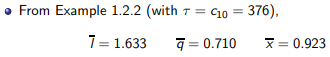

In [23]:
#passing the peice-wise linear vector of jobs in system, queue and server, along with the peice-wise linear vector of time 
#These are passed as seen below to the get_TimeAveragedStats function to compute their respective mean 

print("Mean jobs in system :", get_TimeAveragedStats(N_p,t_p))
print("Mean jobs in Queue  :", get_TimeAveragedStats(Q_p,t_p))
print("Server utilisation  :", get_TimeAveragedStats(S_p,t_p))

Image(filename='averages.png',width=400, height=200)

Average Wait Time:  61.400000000000006


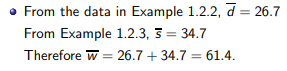

In [24]:
def AverageWaitTime(s_i,d_i):
    aveWait = np.mean(s_i)+np.mean(d_i) #computes the average wait time by taking the addition of mean of service and delay
    return aveWait

serviceTimeStart = []
serviceTimeEnd = []

for i in range(len(var_dict['event_history']['event_type'])): #for all the events 
    if(var_dict['event_history']['event_type'][i] == 'begin_service'): #we find the begin service times 
        serviceTimeStart.append(var_dict['event_history']['time_stamp'][i])
        
    if(var_dict['event_history']['event_type'][i] == 'end_service'): #and the end service times 
        serviceTimeEnd.append(var_dict['event_history']['time_stamp'][i])

serviceTime = np.subtract(serviceTimeEnd,serviceTimeStart) #we can compute the service time in this manner 
#i.e as the subtraction of when the service ends to when it starts 

#Since the purpose of this part is to verify consistency with the example in the notes 
#the first element of the array's for delay and service were removed so that the average can match 
#this is because of the initially added 0 in the arrays in a cell (cell which states not to be modified) before, this 0 is not consistent with the notes
del d_i[0]
serviceTime = np.delete(serviceTime,0)

aveWait = AverageWaitTime(serviceTime,d_i)
print("Average Wait Time: ", aveWait)

Image(filename='averagewait.png',width=300, height=200)

Average Inter-Arrival Time:  32.0


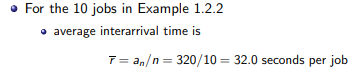

In [25]:
var_dict['sim_var']['inter_arr_time'].pop() #removing last element from the interarrival times. 
#As seen before this is simply the concatention element intended to keep the algorithm running 

iatMean = np.mean(var_dict['sim_var']['inter_arr_time']) #mean calculation 
print("Average Inter-Arrival Time: ", iatMean)

Image(filename='averageInterarrivalTime.png',width=300, height=200)

# Graded Questions start here

In this graded section you will be developing a model for:

A resource allocation system. The system consists of N=5 similar resources, which are assigned on a first-come-first-served basis. You will consider two types. In both types you will assume that both the inter-arrival-time for requests (average = 5 time units) and the resource holding times (average = 20 time units) are exponentialy distributed. The two types are;

1. Requests that arrive when all N resources have been allocated are rejected.

1. Requests that arrive when all N resources have been allocated are queued in a finite capacity buffer.

# QUESTION 1: 

## Simulate the type I system (i.e requests are rejected if all resources are allocated). In this system we are interested in computing the reject rate.
## reject rate = (Number of rejected requests)/(Total number of requests)
## Copy and modify the necessary functions to model the system. Simulate and compute the rejection rate. 
## [5 marks] (for the correct selection of functions)
## [30 marks] (for the correct modifications) 
## [5 marks] (for consistency checking during debugging)
## [10 marks] (for the correct rejection rate)



In [26]:
rejectedRequests = 0 #to holds the requests unable to be serviced since the servers are occupied 

In [27]:
#Modifications include seed, simulation time, and adding 'N'
np.random.seed(0)
fileOutA = True   # Flag, if True save state variable values to state_history
notice=[]       # notice = [ notice number, time, type, meta-param ]
                # type = 0, arrival
                # type = 1, begin service
                # type = 2, end service
                # meta-param = extra parameters in a tuple

# Store state variables, simulation variables and history in a python dictionary 
# and pass dict pointer to functions
var_dict={}
var_dict['state_var']={'Q':0, 'S':0, 'N':5} # Server State 0=idle, 1=busy
#adding variable N, representing the number of servers 
#
var_dict['sim_var'] = {'EN':0, # Event Notice Number
                       'event_list':[], # Event calendar list
                       'now':0.0, # simulation time
                       'inter_arr_time':[],  #array to store history
                       'service_time':[],    # array to store history
                       'sim_end_time':1000}
#
var_dict['state_history'] = {'Q':[], 'S':[], 'time_stamp':[]} 
var_dict['event_history'] = {'event_type':[], 'time_stamp':[]}

In [28]:
#Note these functions are to be used for the type 1 and type 2 system 
#Using the other random number generators will result in an out of bounds index (and remove the randomness)
#No modifications
def InterArrivalTime(average=5):
    return -average*np.log(np.random.rand())

def ServiceTime(average=20):
    return -average*np.log(np.random.rand())

In [29]:
def EventRoutineArrival(var_dict):
    # Write to history
    var_dict['event_history']['event_type'].append('arrival')
    var_dict['event_history']['time_stamp'].append(var_dict['sim_var']['now'])    
    #
    # schedule next arrival event
    if var_dict['sim_var']['now'] < var_dict['sim_var']['sim_end_time']:
        var_dict['sim_var']['EN'] += 1
        iat = InterArrivalTime() #calculate the inter-arrival time 
        var_dict['sim_var']['inter_arr_time'].append(iat) #appended it in the variable 
        eventTime = var_dict['sim_var']['now'] + iat #add it to the event time 
        notice=[var_dict['sim_var']['EN'], eventTime, 0,()]
        ScheduleEventNotice(notice, var_dict)
    #
    # update state variables and event_list   
    if var_dict['state_var']['S'] < var_dict['state_var']['N']:   #if S<N, i.e not fully occupied 
        var_dict['sim_var']['EN'] += 1
        notice=[var_dict['sim_var']['EN'], var_dict['sim_var']['now'], 1, ()]
        ScheduleEventNotice(notice, var_dict)
    else:
        global rejectedRequests #When all servers are full we end up with a rejected request 
        rejectedRequests = rejectedRequests + 1 
    #
    return 0


def EventRoutineBeginService(var_dict):
    #only modification is the removal of the queue decrement and S is incremented
    # Write to history
    var_dict['event_history']['event_type'].append('begin_service')
    var_dict['event_history']['time_stamp'].append(var_dict['sim_var']['now'])    
    #
    # update state variables and event_list
    var_dict['state_var']['S'] += 1 #in this case S is incremented to indicate the occupation of one server 
    #
    var_dict['sim_var']['EN'] += 1
    sT = ServiceTime()
    var_dict['sim_var']['service_time'].append(sT)
    eventTime = var_dict['sim_var']['now'] + sT
    notice=[var_dict['sim_var']['EN'], eventTime, 2, ()]
    ScheduleEventNotice(notice, var_dict)
    #
    return 0
    

def EventRoutineEndService(var_dict):
    #anything related to a queue is removed 
    
    # Write to history
    var_dict['event_history']['event_type'].append('end_service')
    var_dict['event_history']['time_stamp'].append(var_dict['sim_var']['now'])    
    #
    # update state variables and event_list
    var_dict['state_var']['S'] -= 1  #S is dercremented to represent freeing up a server 
    
    #
    return 0


In [30]:
#Simulation algorithm remains unchanged 
# Schedule arrival event at time NOW; boot-strapping the simulation
notice=[var_dict['sim_var']['EN'], var_dict['sim_var']['now'], 0, ()]
ScheduleEventNotice(notice, var_dict)


print('Start of Simulation run')

while (var_dict['sim_var']['event_list']!=[]):
    var_dict['sim_var']['now'] = var_dict['sim_var']['event_list'][0][1]
    if var_dict['sim_var']['event_list'][0][2]==0: #identifying the type of event 
        EventRoutineArrival(var_dict)
    elif var_dict['sim_var']['event_list'][0][2]==1:
        EventRoutineBeginService(var_dict)
    elif var_dict['sim_var']['event_list'][0][2]==2:
        EventRoutineEndService(var_dict)
    else:
        print('Unknown event type')

    var_dict['sim_var']['event_list'].pop(0)      # Remove first notice
    if fileOutA: writeToFile(var_dict)

print('End of Simulation run')

Start of Simulation run
End of Simulation run


In [31]:
print(rejectedRequests) #Showing the amount of rejected customers 
request = 0

for i in range(len(var_dict['event_history']['event_type'])): #caculation of the total requests made (i.e all arrivals)
    if(var_dict['event_history']['event_type'][i] == 'arrival'):
        request = request + 1 
print("Rejection rate: ", rejectedRequests/request) #calculation of the rejection rate as decimal

22
Rejection rate:  0.12429378531073447


In [32]:
print(np.mean(var_dict['sim_var']['inter_arr_time'])) #Printing out averages for consistency debugging 
print(np.mean(var_dict['sim_var']['service_time']))


print("\n")
print(var_dict['state_history']['S'])# printing the state history of the server to make sure it reaches full capacity and no more
#along with making sure it starts and finishes at 0. 

print("\n")

counter = 0
for i in range(len(var_dict['state_history']['S'])):
    if(var_dict['state_history']['S'][i] == 5 and var_dict['event_history']['event_type'][i] == 'arrival'):
        counter += 1 #When the server is full and the event is an arrival there should be a rejection 
             
if(counter == rejectedRequests): ##these should match 
    print("Success\n")

#below we expect each change in state S to generate an event notice. 
#However we expect this array to have one more, since event notice only starts counting after the first arrival
#Whereas the len will count the initial state of S (when not one arrival has been made)
print(var_dict['sim_var']['EN'])
print(len(var_dict['state_history']['S']))

5.692842121038861
17.656557685681904


[0, 1, 1, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 4, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 1, 1, 2, 2, 3, 3, 4, 3, 3, 4, 3, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 3, 2, 1, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 4, 3, 3, 4, 3, 2, 2, 3, 3, 4, 4, 5, 5, 5, 4, 3, 3, 4, 4, 5, 5, 4, 4, 5, 4, 3, 3, 4, 3, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2, 2, 3, 3, 4, 3, 3, 4, 3, 2, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 4, 3, 2, 1, 1, 2, 2, 3, 3, 4, 3, 3, 4, 3, 3, 4, 4, 5, 4, 3, 3, 4, 3, 2, 2, 3, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 4, 4, 5, 4, 4, 5, 4, 3, 2, 2, 3, 3, 4, 3, 3, 4, 4, 5, 5, 4, 4, 5, 5, 4, 3, 3, 4, 4, 5, 4, 3, 2, 2, 3, 3, 4, 3, 2, 2, 3, 2, 2, 3, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 4, 3, 2, 1, 1, 2, 2, 3, 2, 2, 3, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 2, 3, 2, 1, 1, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 4, 3, 2, 2, 3, 2, 2, 3, 3, 4, 4, 5, 4, 3, 3, 4, 4, 5, 5, 5, 4, 3, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2, 1, 1, 2, 2, 3, 3, 

# QUESTION 2:
## Simulate the type II system (i.e requests are queued in a buffer of finite size if all resources are allocated). In this system we are interested in computing the reject rate and time spent in queue.
## Copy your type I system below and modify it to include queue of finite buffer size.
## Customers get fed up if they wait for more than 5 time units and if the system rejection rate is more than 3%.
## Suggest the buffer capacity that satisfies the above constraints.
## [10 marks] (for explaining your reasoning)
## [10 marks] (for the correct modifications) 
## [20 marks] (for consistency checking during debugging)
## [10 marks] (for the correct buffer size)

In [33]:
fedUpCustomers = 0 #The amount of customers that would leave the system 
maxBufferSize = 5#the maximum size of the buffer (Justification is provided at the end)

In [34]:
#Only modified the seed, adding the state variable N, and simulation time
np.random.seed(0)
fileOutA = True   # Flag, if True save state variable values to state_history
notice=[]       # notice = [ notice number, time, type, meta-param ]
                # type = 0, arrival
                # type = 1, begin service
                # type = 2, end service
                # meta-param = extra parameters in a tuple

# Store state variables, simulation variables and history in a python dictionary 
# and pass dict pointer to functions
var_dict={}
var_dict['state_var']={'Q':0, # Queue Length, Q=0 when empty
                       'S':0,
                       'N':5} # Server State 0=idle, 1=busy
#
var_dict['sim_var'] = {'EN':0, # Event Notice Number
                       'event_list':[], # Event calendar list
                       'now':0.0, # simulation time
                       'inter_arr_time':[],  #array to store history
                       'service_time':[],    # array to store history
                       'sim_end_time':1000}
#
var_dict['state_history'] = {'Q':[], 'S':[], 'time_stamp':[]} 
var_dict['event_history'] = {'event_type':[], 'time_stamp':[]}

In [35]:
def EventRoutineArrival(var_dict):
    #all modification will include comments (applies to all the assignment)
    
    global maxBufferSize 
    # Write to history
    if(var_dict['state_var']['S'] < var_dict['state_var']['N'] or 
       (var_dict['state_var']['S'] >= var_dict['state_var']['N'] and var_dict['state_var']['Q'] < maxBufferSize)):
        #record to history if customer is not fed up 
        
        var_dict['event_history']['event_type'].append('arrival')
        var_dict['event_history']['time_stamp'].append(var_dict['sim_var']['now'])    
        
    # schedule next arrival event
    if var_dict['sim_var']['now'] < var_dict['sim_var']['sim_end_time']:
        var_dict['sim_var']['EN'] += 1
        iat = InterArrivalTime() #calculate the interarrival time 
        var_dict['sim_var']['inter_arr_time'].append(iat) #storing it in the simulation variable 
        eventTime = var_dict['sim_var']['now'] + iat #adding the interarrival time to the event time 
        notice=[var_dict['sim_var']['EN'], eventTime, 0,()]
        ScheduleEventNotice(notice, var_dict) #schedule arrival 
        
    
    if var_dict['state_var']['S'] < var_dict['state_var']['N']:   #if server is not fully occupied 
        var_dict['sim_var']['EN'] += 1
        notice=[var_dict['sim_var']['EN'], var_dict['sim_var']['now'], 1, ()]
        ScheduleEventNotice(notice, var_dict) #schedule begin service 
    else:
        if var_dict['state_var']['Q'] >= maxBufferSize: #if the queue is full
            global fedUpCustomers  #customer is rejected 
            fedUpCustomers += 1 
        else:
            var_dict['state_var']['Q'] += 1 #if buffer is not full, add to buffer 
            #note in this case customer is still listed as arrival 
    return 0


def EventRoutineBeginService(var_dict):
    #Queue decrement was removed from here 
    
    # Write to history
    var_dict['event_history']['event_type'].append('begin_service')
    var_dict['event_history']['time_stamp'].append(var_dict['sim_var']['now'])    
    #
    # update state variables and event_list 
    var_dict['state_var']['S'] += 1 #server is updated by an increment 
    #
    var_dict['sim_var']['EN'] += 1
    sT = ServiceTime()
    var_dict['sim_var']['service_time'].append(sT)
    eventTime = var_dict['sim_var']['now'] + sT
    notice=[var_dict['sim_var']['EN'], eventTime, 2, ()]
    ScheduleEventNotice(notice, var_dict)
    #
    return 0
    

def EventRoutineEndService(var_dict):
    # Write to history
    var_dict['event_history']['event_type'].append('end_service')
    var_dict['event_history']['time_stamp'].append(var_dict['sim_var']['now'])    
    #
    # update state variables and event_list
    var_dict['state_var']['S'] -= 1  #free up a sever 
    if var_dict['state_var']['Q'] > 0:  #if buffer is not empty 
        var_dict['state_var']['Q'] -= 1  #free up one space from the buffer 
        var_dict['sim_var']['EN'] +=1
        eventTime = var_dict['sim_var']['now']
        notice = [var_dict['sim_var']['EN'], eventTime, 1, ()] #start a begin service 
        ScheduleEventNotice(notice, var_dict)
    #
    return 0



In [36]:
#This cell remains unmodified 
# Schedule arrival event at time NOW; boot-strapping the simulation
notice=[var_dict['sim_var']['EN'], var_dict['sim_var']['now'], 0, ()]
ScheduleEventNotice(notice, var_dict)


print('Start of Simulation run')

while (var_dict['sim_var']['event_list']!=[]):
    var_dict['sim_var']['now'] = var_dict['sim_var']['event_list'][0][1]
    if var_dict['sim_var']['event_list'][0][2]==0: #identifying the type of event 
        EventRoutineArrival(var_dict)
    elif var_dict['sim_var']['event_list'][0][2]==1:
        EventRoutineBeginService(var_dict)
    elif var_dict['sim_var']['event_list'][0][2]==2:
        EventRoutineEndService(var_dict)
    else:
        print('Unknown event type')

    var_dict['sim_var']['event_list'].pop(0)      # Remove first notice
    if fileOutA: writeToFile(var_dict)

print('End of Simulation run')

Start of Simulation run
End of Simulation run


In [37]:
waitTimeInQueue = FindDelay(var_dict) #Finding the delay (wait time in queue )
print(np.mean(waitTimeInQueue)) #calculating the average. 
#To best satisfying the criteria we expect the average to be below or close to 5 

4.34746820559883


In [38]:
print(fedUpCustomers) #These are the rejected customers 

request = 0
for i in range(len(var_dict['event_history']['event_type'])):
    if(var_dict['event_history']['event_type'][i] == 'arrival'): #Finding the arrivals. 
        request = request + 1   #Note in this case, rejected customers are not added as arrivals
        
print("Rejection rate: ", fedUpCustomers/(request+fedUpCustomers)) #accounted for here

5
Rejection rate:  0.02577319587628866


In [39]:
#Below is some debugging consistency checking 

#As a consistency check we make sure their average matches the one we expect 
print(np.mean(var_dict['sim_var']['inter_arr_time']))
print(np.mean(var_dict['sim_var']['service_time']))
#any variation may effect the buffer size's ability to fit the set of constraints 

5.1905354140656375
19.163509013672833


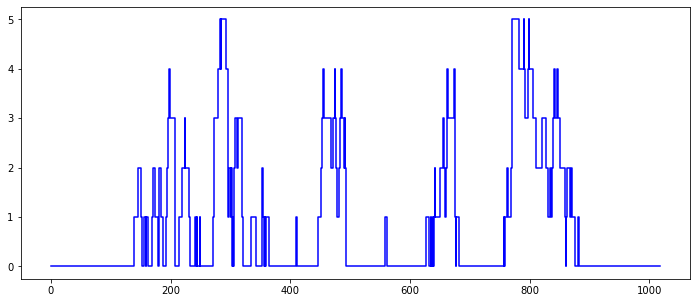

In [40]:
Q, t = get_jobs_queue_vs_t(var_dict)
Q_p = get_piecewise_vec(np.array(Q),0)
t_p = get_piecewise_vec(np.array(t),1)
plt.figure(figsize=(12,5))
plt.plot(t_p, Q_p,'b')
plt.show()
#Looking at the below chart one is able to see how the queue behaves (is occupied) as time passes 
#We notice that over all, the queue only reaches maximum capacity a few times, 
#reducing the chance of having several customers rejected. The fact it does reach max capacity is also good. 
#Since this would imply that at some point in time all of it's size is being used, indicating it probably is not too big 
#Also the average wait time corresponds to the constraints meaning customers are not left waiting too long 
#Along with this we can notice, how the queue is initially empty, and empties itself before the simulation finishes 
#This is expected to be the case always since the 5 servers would be occupyed 

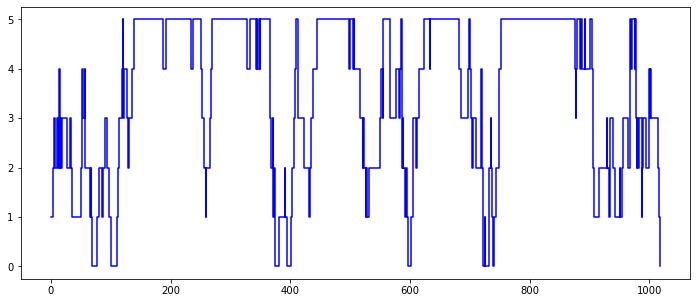

In [41]:
S, t = get_server_status_vs_t(var_dict)
S_p = get_piecewise_vec(np.array(S),0)
t_p = get_piecewise_vec(np.array(t),1)
plt.figure(figsize=(12,5))
plt.plot(t_p, S_p,'b')
#Below we see that the servers are continuosly occupied, this is good as it would imply they are working at maximum capacity
#For most of the time 4 to 5 servers are working, and reaches 0 at the end 

In [42]:
print("Mean jobs in system :", get_TimeAveragedStats(N_p,t_p))
print("Mean jobs in Queue  :", get_TimeAveragedStats(Q_p,t_p))
print("Server utilisation  :", get_TimeAveragedStats(S_p,t_p))
#The below stats confirm the above in terms of averages. 
#The fact that mean jobs in queue is lower than the maximum is good since this would imply, 
#the queue isn't at maximum capacity all/most the time, implying it is too small. Futhermore, higher numbers
#would indicate a lot of ppl are spending time in the queue, since at any point in time the queue would
#have a significant number of people waiting 
#In terms of server utilisation, we expect the number to be towards the higher end (3-4.5), since this would mean 
#efficient use of the servers

Mean jobs in system : 1.1856248765682562
Mean jobs in Queue  : 0.8075990801760876
Server utilisation  : 3.5598724408052527


In [43]:
#Justification for the buffer size 

#One notices that a longer buffer would increase the wait time and lower the rejection rate 
#whereas a smaller buffer would increase the rejection rate and lower the wait time (this can also be used as a consistency check)
#Keeping this in mind, adjusting the seed and simulation time to account for variation, the best buffer size is that of 5. 
#Using this size, on average it tends to cover the constraints best. Note as with anything, there are some exceptions to this rule
#This along with the stats explained above makes me confident in this choice of size of the buffer to be an optimal one. 